<a href="https://colab.research.google.com/github/Parveen2327/TCW-RPGP-DS01-02/blob/main/RPGP_Module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

In [4]:
X = df.drop("Species", axis=1)
y = df["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

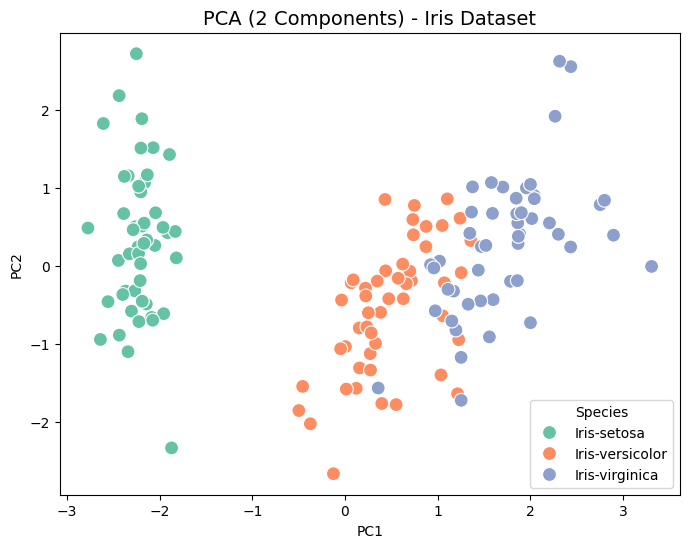

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set2', s=100)
plt.title("PCA (2 Components) - Iris Dataset", fontsize=14)
plt.show()

In [8]:
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3)
X_pca3 = pca_3d.fit_transform(X_scaled)

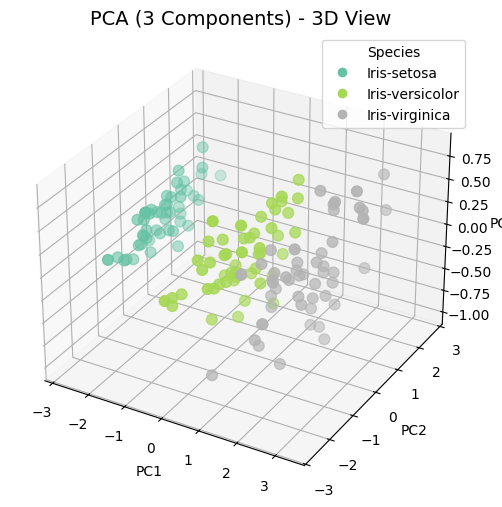

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=pd.Categorical(y).codes, cmap='Set2', s=60)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("PCA (3 Components) - 3D View", fontsize=14)
handles, labels = scatter.legend_elements()
plt.legend(handles, y.unique(), title="Species")
plt.show()

In [13]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [14]:
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Species'] = y


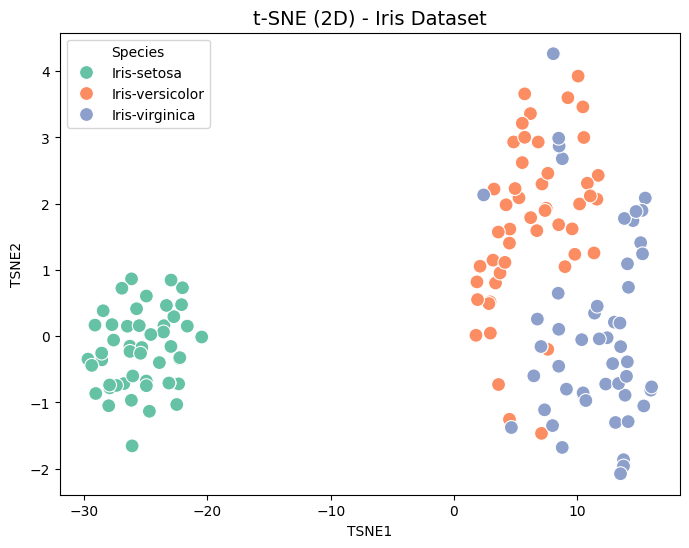

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Species', palette='Set2', s=100)
plt.title("t-SNE (2D) - Iris Dataset", fontsize=14)
plt.show()